In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


              year  yield_bu_acre  yield_t_ha      trend  jun_shortfall  \
count    37.000000      37.000000   37.000000  37.000000      37.000000   
mean   2006.000000      41.568649    2.795536  19.000000       0.293498   
std      10.824355       6.592185    0.443331  10.824355       0.621061   
min    1988.000000      26.380000    1.774083   1.000000       0.000000   
25%    1997.000000      37.200000    2.501740  10.000000       0.000000   
50%    2006.000000      40.880000    2.749224  19.000000       0.000000   
75%    2015.000000      47.500000    3.194426  28.000000       0.264523   
max    2024.000000      52.380000    3.522611  37.000000       2.862572   

         temp_JA    prec_JA  prec_JA_sq  dummy_2003  harvest_total_acres  \
count  37.000000  37.000000   37.000000   37.000000         3.700000e+01   
mean   73.188480   3.794357   14.898272    0.027027         1.338765e+08   
std     1.798194   0.717670    6.065312    0.164399         1.153830e+08   
min    68.876625   2

In [ ]:
df = pd.read_csv("data/processed/waob_features_national.csv")

print(df.describe())

              year  yield_bu_acre  yield_t_ha      trend  jun_shortfall  \
count    37.000000      37.000000   37.000000  37.000000      37.000000   
mean   2006.000000      41.568649    2.795536  19.000000       0.293498   
std      10.824355       6.592185    0.443331  10.824355       0.621061   
min    1988.000000      26.380000    1.774083   1.000000       0.000000   
25%    1997.000000      37.200000    2.501740  10.000000       0.000000   
50%    2006.000000      40.880000    2.749224  19.000000       0.000000   
75%    2015.000000      47.500000    3.194426  28.000000       0.264523   
max    2024.000000      52.380000    3.522611  37.000000       2.862572   

         temp_JA    prec_JA  prec_JA_sq  dummy_2003  harvest_total_acres  \
count  37.000000  37.000000   37.000000   37.000000         3.700000e+01   
mean   73.188480   3.794357   14.898272    0.027027         1.338765e+08   
std     1.798194   0.717670    6.065312    0.164399         1.153830e+08   
min    68.876625   2

count    32.000000
mean     73.152723
std       1.921125
min      68.876625
25%      71.927974
50%      73.393376
75%      74.517799
max      75.840300
Name: temp_JA, dtype: float64


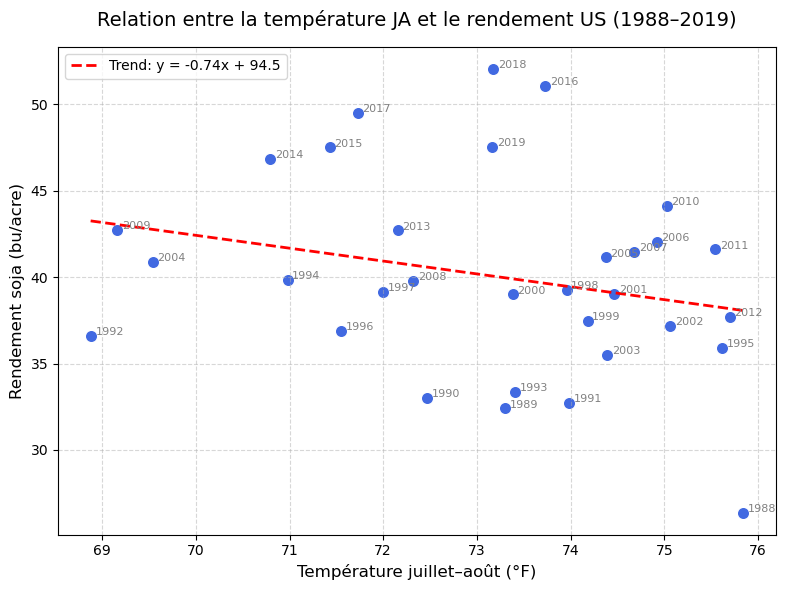

In [4]:
# Garder les années utiles
df = df[(df["year"] >= 1988) & (df["year"] <= 2019)]
print(df["temp_JA"].describe())

# Création du scatter
plt.figure(figsize=(8,6))
plt.scatter(df["temp_JA"], df["yield_bu_acre"], color="royalblue", edgecolor="white", s=80)

# Ajout des labels d'année
for _, row in df.iterrows():
    plt.text(row["temp_JA"] + 0.05, row["yield_bu_acre"] + 0.05, str(int(row["year"])), fontsize=8, color="gray")

# Ajustement de la droite de régression linéaire
coef = np.polyfit(df["temp_JA"], df["yield_bu_acre"], 1)
x_vals = np.linspace(df["temp_JA"].min(), df["temp_JA"].max(), 100)
y_vals = np.polyval(coef, x_vals)
plt.plot(x_vals, y_vals, color="red", linestyle="--", linewidth=2, label=f"Trend: y = {coef[0]:.2f}x + {coef[1]:.1f}")

# Mise en forme
plt.xlabel("Température juillet–août (°F)", fontsize=12)
plt.ylabel("Rendement soja (bu/acre)", fontsize=12)
plt.title("Relation entre la température JA et le rendement US (1988–2019)", fontsize=14, pad=15)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
